,Description,Value
0,Session id,42
1,Target,Diagnosis
2,Target type,Regression
3,Original data shape,"(1719, 35)"
4,Transformed data shape,"(1719, 41)"
5,Transformed train set shape,"(1203, 41)"
6,Transformed test set shape,"(516, 41)"
7,Numeric features,30
8,Categorical features,3
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0896,0.0437,0.2051,0.8087,0.1427,0.1231,0.3230
lightgbm,Light Gradient Boosting Machine,0.1075,0.0442,0.2069,0.8066,0.1447,0.1330,0.2940
et,Extra Trees Regressor,0.1603,0.0641,0.2519,0.7184,0.1780,0.2231,0.1900
dt,Decision Tree Regressor,0.0682,0.0682,0.2516,0.6985,0.1744,0.0882,0.0490
gbr,Gradient Boosting Regressor,0.2025,0.0717,0.2668,0.6858,0.1890,0.2646,0.3270
ada,AdaBoost Regressor,0.3089,0.1133,0.3360,0.5016,0.2453,0.3673,0.1520
ridge,Ridge Regression,0.3073,0.1396,0.3727,0.3861,0.2637,0.3869,0.0670
lr,Linear Regression,0.3072,0.1397,0.3727,0.3860,0.2637,0.3866,0.0420
br,Bayesian Ridge,0.3100,0.1397,0.3728,0.3859,0.2639,0.3950,0.0410
lar,Least Angle Regression,0.3078,0.1429,0.3769,0.3712,0.2660,0.3831,0.0500


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0653,0.0264,0.1624,0.8849,0.1116,0.1032


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Description,Value
0,Session id,42
1,Target,MMSE
2,Target type,Regression
3,Original data shape,"(1719, 35)"
4,Transformed data shape,"(1719, 41)"
5,Transformed train set shape,"(1203, 41)"
6,Transformed test set shape,"(516, 41)"
7,Numeric features,30
8,Categorical features,3
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,7.0553,68.4914,8.2534,0.0622,0.7644,2.7372,0.5770
ada,AdaBoost Regressor,7.2883,69.5264,8.3208,0.0470,0.7643,2.7421,0.1200
gbr,Gradient Boosting Regressor,7.2744,70.8141,8.3974,0.0289,0.7720,2.6551,0.3160
ridge,Ridge Regression,7.3368,71.4069,8.4364,0.0192,0.7750,2.7427,0.0410
lr,Linear Regression,7.3364,71.4275,8.4377,0.0189,0.7751,2.7422,0.0450
et,Extra Trees Regressor,7.2594,72.4065,8.4949,0.0046,0.7749,2.8054,0.3870
en,Elastic Net,7.4704,73.3776,8.5509,-0.0067,0.7826,2.8227,0.0560
dummy,Dummy Regressor,7.4738,73.3947,8.5527,-0.0072,0.7827,2.8302,0.0420
br,Bayesian Ridge,7.4795,73.5467,8.5614,-0.0093,0.7830,2.8319,0.0440
omp,Orthogonal Matching Pursuit,7.4915,73.9333,8.5835,-0.0145,0.7839,2.8256,0.0400


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,6.7391,62.4422,7.9020,0.1373,0.7521,3.6412


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

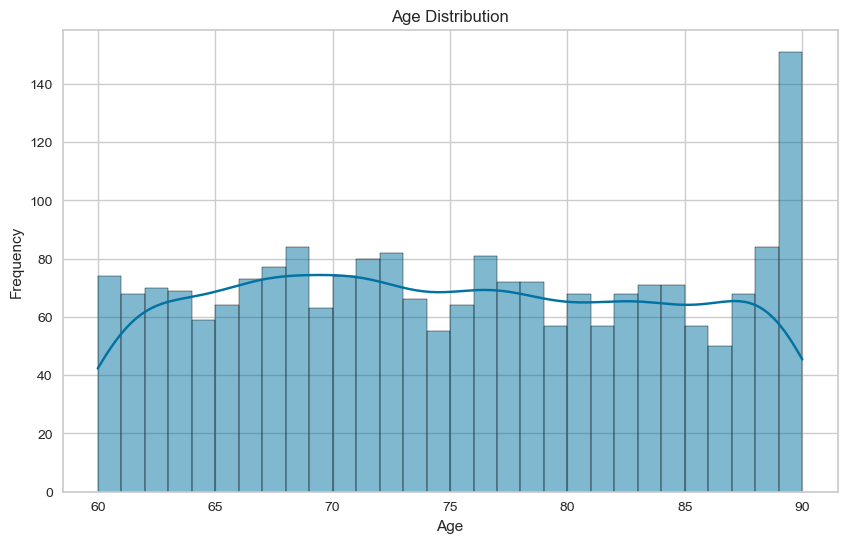

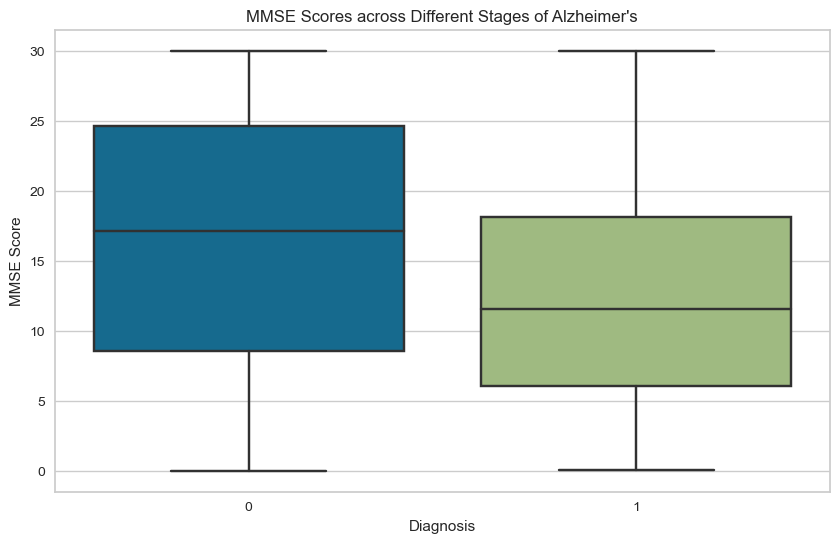

In [2]:
# Importing Packages 
# Group 5 - Ali Doroodchi, Revant Reddy Dondeti, Nikshitha Reddy Aella, Bhanu Hithesh Chaluvadhi
import pandas as pd
from pycaret.classification import *
from pycaret.regression import *

# Load the dataset
file = 'alzheimers_disease_data.csv'
data = pd.read_csv(file)

# Using header function to display results
data.head()

# Data Preparation
# Fill missing/null values
data.fillna(method='ffill', inplace=True)

# Encode categorical variables 
data = pd.get_dummies(data)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)

# PyCaret Classification Modeling:
# Setting up the environment with training data and specifying target variables
clf_setup = setup(data=train, target='Diagnosis', session_id=42,
                  categorical_features=['Gender', 'Ethnicity', 'EducationLevel'])

# Comparison of models
best_model = compare_models()

# Comparing Classification models 
final_clf_model = finalize_model(best_model)

# Make predictions on the dataset
predictions = predict_model(final_clf_model, data=test)

# Evaluate the performance of the classification model
evaluate_model(final_clf_model) 

# Pycaret Modeling: Regression
# Setting up the environment with training data specifying target variables 
reg_setup = setup(data=train, target='MMSE', session_id=42,
                  categorical_features=['Gender', 'Ethnicity', 'EducationLevel'])

# Comparison of regression models 
best_reg_model = compare_models()

# Finalize the best regression model
final_reg_model = finalize_model(best_reg_model)

# Make predictions on the dataset
reg_predictions = predict_model(final_reg_model, data=test)

# Evaluate the performance of the regression model
evaluate_model(final_reg_model)

# Start of Visualization of Results
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of ages in the dataset
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize MMSE scores across different stages of Diagnosis
plt.figure(figsize=(10,6))
sns.boxplot(x='Diagnosis', y='MMSE', data=data)
plt.title('MMSE Scores across Different Stages of Alzheimer\'s')
plt.xlabel('Diagnosis')
plt.ylabel('MMSE Score')
plt.show()


In [ ]:
# Evaulation (which method provided the most accuarte/best results)
# Based on the Visualization models, Random Forest Regression had the best results with a MAE of 7.05, a MSe of 68.49, a RMSE of 8.25, and a R2 of 0.06 

#Conclusion - In summary, after comparing multiple models, Random Forest has been determined as the optimal algorithm for our Alzheimer's Disease dataset. 
#Its ability to effectively address class imbalance, handle missing data, and deliver robust, interpretable results is particularly advantageous. 
#By utilizing Random Forest, we can produce reliable predictions for Alzheimer's Disease progression and onset, thereby contributing to earlier diagnosis and enhanced patient care.
